## LIBRARIES USED

In [1]:
# GENERAL LIBRARIES
import pandas as pd
import numpy as np


# FOR VIZUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud


# FOR CLEANING 
import neattext as nt
import neattext.functions as nfx
import regex as re


# FOR TOKENIZING
from collections import Counter


# FOR SENTIMENT ANALYSIS & Vectorizer for NLP
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
# import Word2Vec


# MODELLING & EVALUATION PACKAGES
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_confusion_matrix

#CROSS VALIDATION
from sklearn.model_selection import cross_val_score

#MACHINE LEARNING
import tensorflow as tf
from tensorflow.keras import regularizers

from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences




from tensorflow import keras


# INTERPRETATION
import eli5


# SAVING THE MODEL
import joblib

# WARNINGS
import warnings
warnings.filterwarnings('ignore')

## RETRIEVING DATA SET FROM PART 1

As mentioned earlier, the following dataset is merged product of 5 indivdual datasets from 5 retail sectors. Each data set contains at least 1000 reviews

In [2]:
df = pd.read_csv("captsone_part1.csv")

In [3]:
df.shape

(7410, 7)

In [4]:
df.isnull().sum()

Unnamed: 0     0
Rating         0
Reviews        0
Review_List    0
clean_text     5
Sub_Score      0
Pol_Score      0
dtype: int64

There are 70 rows where customers did not put reviews. Hence these 70 rows doesnt provide any valuable insight to NLP. 

For this reason we are dropping all the null reviews and unwanted columns. This drop is less than 1% from overall dataset.

In [5]:
df = df.dropna()

#### THIS IS HOW FINAL DATAFRAME LOOKS LIKE

In [6]:
df.isnull().sum()

Unnamed: 0     0
Rating         0
Reviews        0
Review_List    0
clean_text     0
Sub_Score      0
Pol_Score      0
dtype: int64

In [7]:
df.head()

,Unnamed: 0,Rating,Reviews,Review_List,clean_text,Sub_Score,Pol_Score
0,0,2,Usually misses something from the order.,Usually misses something from the order,Usually misses order,0.250000,-0.250000
1,1,5,"Nice McDonald's, great play space for kids of ...",Nice McDonald's great play space for kids of a...,Nice McDonalds great play space kids ages food...,0.819444,0.572222
2,2,1,"Really bad service,\nI went through there driv...",Really bad service\nI went through there drive...,bad serviceI went drive waiting 7 min line fin...,0.833333,-0.360000
3,3,5,Has a Bit of long wait but over all its one th...,Has a Bit of long wait but over all its one th...,Bit long wait best lot options good,0.433333,0.550000
4,4,4,Smaller store compared to the others but very ...,Smaller store compared to the others but very ...,Smaller store compared friendly helpful staff,0.500000,0.187500


In [8]:
df.describe()

,Unnamed: 0,Rating,Sub_Score,Pol_Score
count,7405.000000,7405.000000,7405.000000,7405.000000
mean,3736.299122,4.054693,0.558484,0.311425
std,2158.269731,1.335873,0.222947,0.288241
min,0.000000,1.000000,0.000000,-1.000000
25%,1869.000000,4.000000,0.459184,0.112222
50%,3744.000000,5.000000,0.600000,0.337500
75%,5603.000000,5.000000,0.700000,0.500000
max,7479.000000,5.000000,1.000000,1.000000


## SENTIMENT ANALYSIS (SUBJECTIVITY AND PORALITY) USING TEXTBLOB FUNCTION


SUBJECTIVITY 

Textblob analyzes a review on the basis of its subjectivity. subjectivity is measured between 0 and 1. Higher subjectivity means the review is more a opinion than a objective (facts).

POLARITY

Polarity captures positve and negative emotion in a text. Higher Polarity means positive where as lower polarity means negative.
    


In [9]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', 1)

In [10]:
def getSScore(text):
    return TextBlob(text).sentiment.subjectivity

def getPScore(text):
    return TextBlob(text).sentiment.polarity


# FEATURE SELECTION & MODELLING USING COUNT VECTORIZER

In [11]:
# DEFINING FEATURES AND TARGET VARIABLES

X_cv_features = df["clean_text"]
y_cv_labels = df["Rating"]

In [12]:
# USING COUNT VECTORIZER

cv = CountVectorizer()
X_cv = cv.fit_transform(X_cv_features)

In [13]:
# ALL THE FEATURE NAMES AFTER USING COUNT VECTORIZER FUNCTION

cv_feature_names = cv.get_feature_names()
# cv_feature_names

In [14]:
# SPLIT TRAIN AND TEST SET

X_train, X_test, y_train, y_test = train_test_split(X_cv, y_cv_labels,test_size= 0.20, random_state = 42)

## NAIVE BAYES USING COUNT VECTOR

In [15]:
naive_bayes_cv = MultinomialNB()
naive_bayes_cv.fit(X_train, y_train)

MultinomialNB()

In [16]:
nb_cv_train_score = naive_bayes_cv.score(X_train, y_train)
nb_cv_train_score

0.825793382849426

In [17]:
nb_cv_test_score = naive_bayes_cv.score(X_test, y_test)
nb_cv_test_score

0.7420661715057394

In [18]:
nb_cv_y_predict = naive_bayes_cv.predict(X_test)
nb_cv_y_predict

array([5, 5, 5, ..., 5, 1, 5], dtype=int64)

#### MODEL EVALUATION - CLASSIFICATION REPORT - NAIVE BAYES - COUNT VECTOR

In [19]:
class_report_cv_nb = classification_report(y_test, nb_cv_y_predict)

In [20]:
print(class_report_cv_nb)

              precision    recall  f1-score   support

           1       0.71      0.86      0.78       146
           2       0.87      0.38      0.53        69
           3       0.65      0.19      0.30       124
           4       0.61      0.63      0.62       327
           5       0.79      0.88      0.84       815

    accuracy                           0.74      1481
   macro avg       0.73      0.59      0.61      1481
weighted avg       0.74      0.74      0.72      1481



#### CONFUSION MATRIX  - NAIVE BAYES - COUNT VECTOR

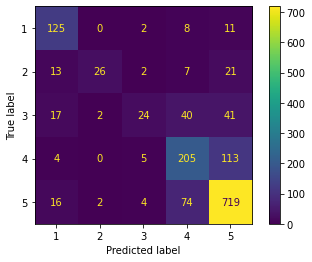

In [21]:
plot_confusion_matrix(naive_bayes_cv, X_test, y_test)

## LOGISTIC REGRESSION USING COUNT VECTOR

In [22]:
logistic_cv = LogisticRegression()

In [23]:
logistic_cv.fit(X_train, y_train)

LogisticRegression()

In [24]:
logistic_cv_train_score = logistic_cv.score(X_train, y_train)
logistic_cv_train_score

0.949020931802836

In [25]:
logistic_cv_test_score = logistic_cv.score(X_test, y_test)
logistic_cv_test_score

0.7846049966239028

In [26]:
logistic_cv_y_predict = logistic_cv.predict(X_test)
logistic_cv_y_predict

array([5, 1, 5, ..., 5, 1, 5], dtype=int64)

#### MODEL EVALUATION - CLASSIFICATION REPORT - LOGISTIC - COUNT VECTOR

In [27]:
class_report_cv_logistic = classification_report(y_test, logistic_cv_y_predict)
print(class_report_cv_logistic)

              precision    recall  f1-score   support

           1       0.81      0.77      0.79       146
           2       0.76      0.54      0.63        69
           3       0.74      0.52      0.61       124
           4       0.70      0.65      0.68       327
           5       0.82      0.90      0.86       815

    accuracy                           0.78      1481
   macro avg       0.76      0.68      0.71      1481
weighted avg       0.78      0.78      0.78      1481



#### CONNFUSION MATRIX - LOGISTIC  - COUNT VECTOR

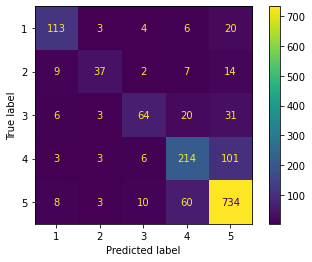

In [28]:
plot_confusion_matrix(logistic_cv, X_test, y_test)

#### INTERPRETATION USING ELI5 (Only Available in Logistic Regression Classification)

In [29]:
eli5_show = eli5.show_weights(logistic_cv, top=5)

In [30]:
class_labels = y_cv_labels.unique().tolist()

In [31]:
cv_feature_names = cv.get_feature_names()

In [32]:
eli5.show_weights(logistic_cv, feature_names = cv_feature_names, target_names = class_labels, top=50)

## K-NEAREST NEIGHBOUR USING COUNT VECTOR

In [33]:
knn_cv = KNeighborsClassifier(n_neighbors=5)

In [34]:
knn_cv.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
knn_cv_train_score = knn_cv.score(X_train, y_train)
knn_cv_train_score

0.7700877785280216

In [36]:
knn_cv_test_score = knn_cv.score(X_test, y_test)
knn_cv_test_score

0.6745442268737339

In [37]:
knn_cv_y_predict = knn_cv.predict(X_test)
knn_cv_y_predict

array([5, 5, 5, ..., 5, 5, 3], dtype=int64)

#### MODEL EVALUATION - CLASSIFICATION REPORT - KNN - COUNT VECTOR

In [38]:
class_report_cv_knn = classification_report(y_test, knn_cv_y_predict)
print(class_report_cv_knn)

              precision    recall  f1-score   support

           1       0.53      0.37      0.44       146
           2       0.59      0.33      0.43        69
           3       0.48      0.47      0.48       124
           4       0.62      0.51      0.56       327
           5       0.73      0.85      0.79       815

    accuracy                           0.67      1481
   macro avg       0.59      0.51      0.54      1481
weighted avg       0.66      0.67      0.66      1481



#### CONFUSION MATRIX - KNN - COUNT VECTOR

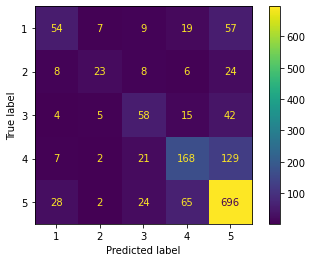

In [39]:
plot_confusion_matrix(knn_cv, X_test, y_test)

## DECISION TREE USING COUNT VECTOR 

In [40]:
dt_cv = DecisionTreeClassifier(criterion = "entropy", max_depth = None)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_cv, y_cv_labels, test_size=0.20, random_state=42)

In [42]:
# X_train

In [43]:
dt_cv.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [44]:
dt_cv_train_score = dt_cv.score(X_train, y_train)
dt_cv_train_score

0.9983119513841998

In [45]:
dt_cv_test_score = dt_cv.score(X_test, y_test)
dt_cv_test_score

0.7697501688048616

In [46]:
dt_cv_y_predict = dt_cv.predict(X_test)
dt_cv_y_predict

array([5, 1, 5, ..., 5, 1, 4], dtype=int64)

In [47]:
class_report_cv_dt = classification_report(y_test, dt_cv_y_predict)
print(class_report_cv_dt)

              precision    recall  f1-score   support

           1       0.62      0.71      0.66       146
           2       0.65      0.59      0.62        69
           3       0.71      0.60      0.66       124
           4       0.68      0.69      0.69       327
           5       0.85      0.85      0.85       815

    accuracy                           0.77      1481
   macro avg       0.70      0.69      0.70      1481
weighted avg       0.77      0.77      0.77      1481



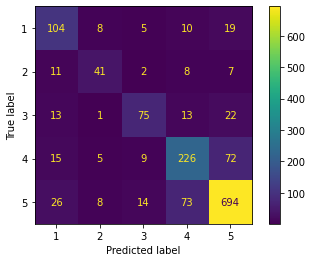

In [48]:
plot_confusion_matrix(dt_cv, X_test, y_test)

### CROSS VALIDATION USING COUNT VECTOR

In [49]:
cross_naive_bayes_CV = (cross_val_score(naive_bayes_cv, X_train, y_train, cv=5)).mean()

cross_logistic_CV = (cross_val_score(logistic_cv, X_train, y_train, cv=5)).mean()

cross_knn_CV = (cross_val_score(knn_cv, X_train, y_train, cv=5)).mean()

cross_dt_CV = (cross_val_score(dt_cv, X_train, y_train, cv=5)).mean()

# print("Naive Bayes Cross Validation Score - ",cross_naive_bayes_CV)
# print("Logistic Cross Validation Score - ",cross_logistic_CV)
# print("KNN Cross Validation Score -  ",cross_knn_CV)
# print("Decision Tree Cross Validation Score - ", cross_dt_CV)

### CROSS VALIDATION OF ALL THE MODELS USING COUNT VECTOR

In [50]:
model_names_CV = ["NB_CV", "Log_CV", "KNN_CV", "DT_CV"]

training_scores_CV = [nb_cv_train_score, logistic_cv_train_score, knn_cv_train_score, dt_cv_train_score]

test_scores_CV = [nb_cv_test_score, logistic_cv_test_score, knn_cv_test_score, dt_cv_test_score]

crossval_scores_CV = [cross_naive_bayes_CV, cross_logistic_CV, cross_knn_CV, cross_dt_CV ]

df_scores_CV = pd.DataFrame({"Model":model_names_CV, "Cross Val Score": crossval_scores_CV, 
                          "Train Score":training_scores_CV, "Test Score": test_scores_CV})

df_scores_CV["Fitting difference %"] = (1-((df_scores_CV["Test Score"]) / (df_scores_CV["Train Score"])).round(3))*100

# df_scores_CV

In [51]:
# df_scores_CV["Cross Val Score"].plot(kind='bar')

In [52]:
# sns.barplot(data=df_scores_CV, x='Model', y='Cross Val Score')

### PREDICT RATING FUNCTION USING COUNT VECTOR

In [54]:
def predict_rating_cv(sample_text, model):
    count_vector = cv.transform(sample_text).toarray()
    prediction = model.predict(count_vector)
    prediction_probability = model.predict_proba(count_vector)
    all_class_prediction_percent = dict(zip(model.classes_, prediction_probability[0]))
    print ("Prediction:{}, Prediction Score:{}". format(prediction[0], np.max(prediction_probability)))
    return all_class_prediction_percent


predict_text = ["The Child Tax Credit expansion has been a historic win for families, keeping 3.8 million children from poverty in November."] 

# Python program to convert a list to string
    
# Function to convert  
def listToString(predict_text): 
    """Convert Any list to a string"""
    
    # initialize an empty string
    text_1 = ""    # text_1 is just a variable
    
    # traverse in the string  
    for ele in predict_text: 
        text_1 += str(ele)  
    
    # return string  
    return text_1 
        

text_2 = listToString(predict_text) 
text_2

print("Subjetivity: ",getSScore(text_2))
print("Polarity: ",getPScore(text_2))
print("*"*50)


print("Naive Bayes")
predict_rating_cv(predict_text, naive_bayes_cv)
print("*"*50)

print("Logistic")
predict_rating_cv(predict_text, logistic_cv)
print("*"*50)

print("KNN")
predict_rating_cv(predict_text, knn_cv)
print("*"*50)  

print("Decision Tree")
predict_rating_cv(predict_text, dt_cv)
print("*"*50)

Subjetivity:  0.2
Polarity:  0.4
**************************************************
Naive Bayes
Prediction:3, Prediction Score:0.5821735418008952
**************************************************
Logistic
Prediction:5, Prediction Score:0.454613789432757
**************************************************
KNN
Prediction:3, Prediction Score:0.6
**************************************************
Decision Tree
Prediction:5, Prediction Score:1.0
**************************************************


# FEATURE SELECTION & MODELLING USING  TF-IDF VECTORIZER(WORD LEVEL)

In [55]:
X_tfidf_features = df["clean_text"]
y_tfidf_labels = df["Rating"]

In [56]:
tfidf = TfidfVectorizer(analyzer = 'word', token_pattern = r'\w{1,}', ngram_range = (2, 3))
X_tfidf = tfidf.fit_transform(X_tfidf_features)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_tfidf_labels,test_size= 0.20, random_state = 42)

## NAIVE BAYES USING TF-IDF

In [58]:
naive_bayes_tfidf = MultinomialNB()

In [59]:
naive_bayes_tfidf.fit(X_train, y_train)

MultinomialNB()

In [60]:
naive_bayes_tfidf_train_score = naive_bayes_tfidf.score(X_train, y_train)
naive_bayes_tfidf_train_score

0.837778528021607

In [61]:
naive_bayes_tfidf_test_score = naive_bayes_tfidf.score(X_test, y_test)
naive_bayes_tfidf_test_score 

0.7224848075624578

In [62]:
nb_tfidf_y_predict = naive_bayes_tfidf.predict(X_test)
nb_tfidf_y_predict

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

#### CLASSIFICATION REPORT - NAIVE BAYES - TF-IDF

In [63]:
class_report_tfidf_nb = classification_report(y_test, nb_tfidf_y_predict)

In [64]:
print(class_report_tfidf_nb)

              precision    recall  f1-score   support

           1       1.00      0.32      0.49       146
           2       1.00      0.23      0.38        69
           3       1.00      0.19      0.32       124
           4       0.99      0.51      0.68       327
           5       0.67      1.00      0.80       815

    accuracy                           0.72      1481
   macro avg       0.93      0.45      0.53      1481
weighted avg       0.81      0.72      0.68      1481



#### CONFUSION MATRIX - NAIVE BAYES - TF-IDF

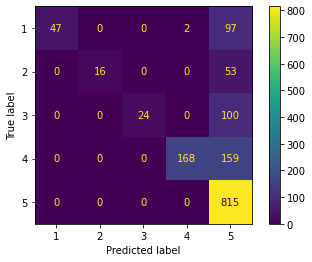

In [65]:
plot_confusion_matrix(naive_bayes_tfidf, X_test, y_test)

## LOGISTIC REGRESSION USING TF-IDF

In [66]:
logistic_tfidf = LogisticRegression()

In [67]:
logistic_tfidf.fit(X_train, y_train)

LogisticRegression()

In [68]:
logistic_tfidf_train_score = logistic_tfidf.score(X_train, y_train)
logistic_tfidf_train_score

0.8298446995273464

In [69]:
logistic_tfidf_test_score = logistic_tfidf.score(X_test, y_test)
logistic_tfidf_test_score

0.7258609047940581

In [70]:
logistic_tfidf_y_predict = logistic_tfidf.predict(X_test)
logistic_tfidf_y_predict

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

#### MODEL EVALUATION - CLASSIFICATION REPORT - LOGISTIC REGRESSION - TF-IDF 

In [71]:
class_report_tfidf_logistic = classification_report(y_test, logistic_tfidf_y_predict)


In [72]:
print(class_report_tfidf_logistic)

              precision    recall  f1-score   support

           1       1.00      0.23      0.38       146
           2       1.00      0.26      0.41        69
           3       1.00      0.31      0.48       124
           4       1.00      0.52      0.68       327
           5       0.67      1.00      0.80       815

    accuracy                           0.73      1481
   macro avg       0.93      0.47      0.55      1481
weighted avg       0.82      0.73      0.69      1481



#### CONFUSION MATRIX - LOGISTIC REGRESSION - TF-IDF 

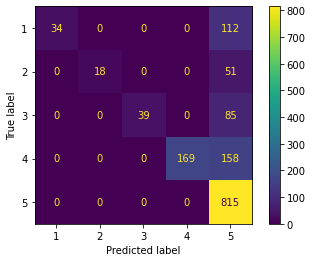

In [73]:
plot_confusion_matrix(logistic_tfidf, X_test, y_test)

## K-NEAREST NEIGHBOR USING TFIDF

In [74]:
knn_tfidf = KNeighborsClassifier(n_neighbors=5)

In [75]:
knn_tfidf.fit(X_train, y_train)

KNeighborsClassifier()

In [76]:
knn_tfidf_train_score = knn_tfidf.score(X_train, y_train)
knn_tfidf_train_score

0.7565833896016205

In [77]:
knn_tfidf_test_score = knn_tfidf.score(X_test, y_test)
knn_tfidf_test_score

0.6009453072248481

In [78]:
knn_tfidf_y_predict = knn_tfidf.predict(X_test)
knn_tfidf_y_predict

array([5, 4, 5, ..., 5, 5, 3], dtype=int64)

#### CLASSIFICATION REPORT - KNN - TF-IDF 

In [79]:
class_report_tfidf_knn = classification_report(y_test, knn_tfidf_y_predict)

In [80]:
print(class_report_tfidf_knn)

              precision    recall  f1-score   support

           1       0.52      0.33      0.40       146
           2       0.50      0.41      0.45        69
           3       0.26      0.65      0.37       124
           4       0.77      0.45      0.57       327
           5       0.71      0.72      0.71       815

    accuracy                           0.60      1481
   macro avg       0.55      0.51      0.50      1481
weighted avg       0.66      0.60      0.61      1481



#### CONFUSION MATRIX - LOGISTIC REGRESSION - TF-IDF 

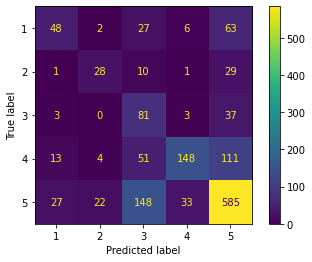

In [81]:
plot_confusion_matrix(knn_tfidf, X_test, y_test)

## DECISION TREE USING TFIDF

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_tfidf_labels,test_size= 0.20, random_state = 42)

In [83]:
dt_tfidf = DecisionTreeClassifier(criterion = "entropy", max_depth = None)

In [84]:
dt_tfidf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [85]:
dt_tfidf_train_score = dt_tfidf.score(X_train, y_train)
dt_tfidf_train_score

0.9918973666441594

In [86]:
dt_tfidf_test_score = dt_tfidf.score(X_test, y_test)
dt_tfidf_test_score

0.775151924375422

In [87]:
dt_tfidf_y_predict = dt_tfidf.predict(X_test)
dt_tfidf_y_predict

array([5, 1, 5, ..., 5, 1, 5], dtype=int64)

In [88]:
class_report_tfidf_dt = classification_report(y_test, dt_tfidf_y_predict)
print(class_report_tfidf_dt)

              precision    recall  f1-score   support

           1       0.72      0.63      0.67       146
           2       0.69      0.54      0.60        69
           3       0.85      0.56      0.67       124
           4       0.81      0.63      0.71       327
           5       0.77      0.91      0.84       815

    accuracy                           0.78      1481
   macro avg       0.77      0.65      0.70      1481
weighted avg       0.78      0.78      0.77      1481



### CROSS VALIDATION SCORE OF ALL MODELS USING TFIDF

In [89]:
cross_naive_bayes_tfidf = (cross_val_score(naive_bayes_tfidf, X_train, y_train, cv=5)).mean()
print("Naive Base - TFIDF Cross Validation Score : ", cross_naive_bayes_tfidf)

cross_logistic_tfidf = (cross_val_score(knn_tfidf, X_train, y_train, cv=5)).mean()
print("Logistic - TFIDF Cross Validation Score : ", cross_logistic_tfidf)

cross_knn_tfidf = (cross_val_score(knn_tfidf, X_train, y_train, cv=5)).mean()
print("KNN - TFIDF Cross Validation Score : ", cross_knn_tfidf)

cross_dt_tfidf = (cross_val_score(dt_tfidf, X_train, y_train, cv=5)).mean()
print("DT - TFIDF Cross Validation Score : ", cross_dt_tfidf)

Naive Base - TFIDF Cross Validation Score :  0.6980091800661421
Logistic - TFIDF Cross Validation Score :  0.5867677329227963
KNN - TFIDF Cross Validation Score :  0.5867677329227963
DT - TFIDF Cross Validation Score :  0.7606356197970122


### PUTTING EVERYTHING IN DATAFRAME USING TFIDF FEATURES

In [90]:
model_names_TFIDF = ["NB_TFIDF", "Log_TFIDF", "KNN_TFIDF", "DT_TFIDF"]

training_scores_TFIDF = [naive_bayes_tfidf_train_score, logistic_tfidf_train_score, knn_tfidf_train_score, dt_tfidf_train_score]

test_scores_TFIDF = [naive_bayes_tfidf_test_score, logistic_tfidf_test_score, knn_tfidf_test_score, dt_tfidf_test_score]

crossval_scores_TFIDF = [cross_naive_bayes_tfidf, cross_logistic_tfidf, cross_knn_tfidf, cross_dt_tfidf ]

df_scores_TFIDF = pd.DataFrame({"Model":model_names_TFIDF, "Cross Val Score": crossval_scores_TFIDF, 
                          "Train Score":training_scores_TFIDF, "Test Score": test_scores_TFIDF})

df_scores_TFIDF["Fitting difference %"] = (1-((df_scores_TFIDF["Test Score"]) / (df_scores_TFIDF["Train Score"])).round(3))*100

# df_scores_TFIDF

## DATAFRAME WITH SCORES 

In [91]:
df_scores = df_scores_CV.append(df_scores_TFIDF)
df_scores

,Model,Cross Val Score,Train Score,Test Score,Fitting difference %
0,NB_CV,0.732610,0.825793,0.742066,10.1
1,Log_CV,0.784773,0.949021,0.784605,17.3
2,KNN_CV,0.642976,0.770088,0.674544,12.4
3,DT_CV,0.751856,0.998312,0.769750,22.9
0,NB_TFIDF,0.698009,0.837779,0.722485,13.8
1,Log_TFIDF,0.586768,0.829845,0.725861,12.5
2,KNN_TFIDF,0.586768,0.756583,0.600945,20.6
3,DT_TFIDF,0.760636,0.991897,0.775152,21.9


<AxesSubplot:xlabel='Model', ylabel='Cross Val Score'>

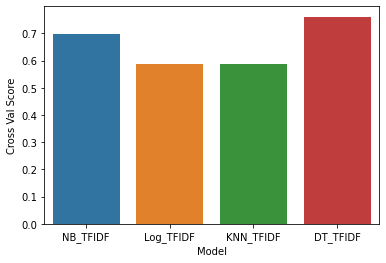

In [92]:
sns.barplot(data=df_scores_TFIDF, x='Model', y='Cross Val Score')

### FUNTION TO PREDICT RATING USING TFIDF

In [93]:
def predict_rating_tfidf(sample_text, model):

    tfidf_vector = tfidf.transform(sample_text).toarray()
    prediction = model.predict(tfidf_vector)
    prediction_probability = model.predict_proba(tfidf_vector)
    all_class_prediction_percent = dict(zip(model.classes_, prediction_probability[0]))
    print("Prediction: {}, Prediction Score:{}".format(prediction[0], np.max(prediction_probability)))
    return all_class_prediction_percent

predict_text = predict_text

# Python program to convert a list to string
    
# Function to convert  
def listToString(predict_text): 
    """Convert Any list to a string"""
    
    # initialize an empty string
    text_1 = ""    # text_1 is just a variable
    
    # traverse in the string  
    for ele in predict_text: 
        text_1 += str(ele)  
    
    # return string  
    return text_1 

print("Subjetivity: ",getSScore(text_2))
print("Polarity: ",getPScore(text_2))
print("*"*50)


print("Naive Bayes")
predict_rating_tfidf(predict_text, naive_bayes_tfidf)
print("*"*50)

print("Logistic")
predict_rating_tfidf(predict_text, logistic_tfidf)
print("*"*50)

print("KNN")
predict_rating_tfidf(predict_text, knn_tfidf)
print("*"*50)  

print("Decision Tree")
predict_rating_tfidf(predict_text, dt_tfidf)
print("*"*50)

Subjetivity:  0.2
Polarity:  0.4
**************************************************
Naive Bayes
Prediction: 5, Prediction Score:0.549291019581364
**************************************************
Logistic
Prediction: 5, Prediction Score:0.5316935507298747
**************************************************
KNN
Prediction: 3, Prediction Score:0.6
**************************************************
Decision Tree
Prediction: 5, Prediction Score:0.4819277108433735
**************************************************


# NEURAL NETWORK / LSTM

In [94]:
def get_keywords(text, num=50000):
    tokens = [tok for tok in text.split()]
    most_frequent_tokens = Counter(tokens).most_common(num)
    return dict(most_frequent_tokens)

reviews = df["clean_text"].tolist()
reviews_combined = ''.join(reviews)
reviews_keywords = get_keywords(reviews_combined)
# print("Total Tokens : ", len(reviews_keywords))
# print("-"*50)
# reviews_keywords

#### TOTAL UNIQUE TOKENS FROM CLEAN TEXT - (Refer Keywords & Extraction Section - Using get_keywords Function)

In [95]:
reviews = df["clean_text"].tolist()
reviews_combined = ''.join(reviews)
reviews_keywords = get_keywords(reviews_combined)
print("Total Tokens : ", len(reviews_keywords))
print("-"*50)
# reviews_keywords

Total Tokens :  15420
--------------------------------------------------


In [96]:
num_words = len(reviews_keywords)
num_words

15420

#### MAX LENGTH ASSUMPTION:

We are assuming there are on avg of 50 words in each review. 

In [97]:
max_length = 50

In [98]:
X_lstm = df["clean_text"]
y_lstm = df["Rating"]
y_lstm = pd.get_dummies(df["Rating"])

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size = 0.2, random_state =42)

### TOKENIZING REVIEWS 

In [100]:
tokenizer = Tokenizer(num_words = num_words)

In [101]:
tokenizer.fit_on_texts(X_train)

### INDEXING TOKENIZED WORDS

In [102]:
word_index = tokenizer.word_index

In [103]:
# word_index

### SEQUENCING EACH REVIEW AS PER WORD INDEX

In [104]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_train_sequences[2]

[191, 59, 16, 4, 46, 135, 37]

#### CHECK INVERSE WAY IF INDEX MATCH THE WORD

In [105]:
reverse_index = dict([(value,key) for (key,value) in word_index.items()])

def decode_sequences(text):
    return " ".join([reverse_index.get (i,"?") for i in text])

### PADDING SEQUENCES

Padding is done to create sequences of same length. LSTM model will only work with equal sequences. 

In [106]:
X_train_padd = pad_sequences(X_train_sequences, maxlen = max_length, padding = "post", truncating = "post" )

In [107]:
X_train_padd[3]

array([  41,   54, 3642,  356,  289,  134, 5163,    3,   54,    2,   76,
        326,    2,   20,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0])

### TESTING IF SEQUENCE / PADDING AND INVERSE WORKS

Example:

In [108]:
print(X_train_sequences[5])
print(X_train_padd[5])
decode_sequences(X_train_sequences[5])

[5164, 1687]
[5164 1687    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


'maydena sick'

In [109]:
len(X_train_sequences[1])

16

#### SEQUENCING AND PADDING TEST DATA (X_test)

In [110]:
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [111]:
X_test_padd = pad_sequences(X_test_sequences, maxlen=max_length, padding="post", truncating = "post")

EXAMPLE

In [112]:
print("Length of Test Sequence",len(X_test_sequences[1]))

print("-"*120)

print(X_test_sequences[2])
print("-"*120)

print(X_test_padd[2])
print("-"*120)

print(len(X_test_padd[1]))
print("-"*120)

decode_sequences(X_test_sequences[2])

Length of Test Sequence 7
------------------------------------------------------------------------------------------------------------------------
[87, 5, 262, 708, 527, 49, 12, 95, 3418, 21, 914]
------------------------------------------------------------------------------------------------------------------------
[  87    5  262  708  527   49   12   95 3418   21  914    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
------------------------------------------------------------------------------------------------------------------------
50
------------------------------------------------------------------------------------------------------------------------


'small store doesnt hold complete range like stores sufficient shopping trip'

### BUILDING NEURAL NETWORK MODEL

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam

In [114]:
model = Sequential()

model.add(Embedding(num_words, 32, input_length = max_length))

model.add(LSTM(64, dropout = 0.1))

model.add(Dense(5, activation = 'sigmoid'))

optimizer = Adam(learning_rate = 3e-4)

model.compile(loss = "categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

In [115]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 32)            493440    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 5)                 325       
Total params: 518,597
Trainable params: 518,597
Non-trainable params: 0
_________________________________________________________________


In [116]:
X_train_padd.shape

(5924, 50)

In [117]:
y_train.value_counts()

1  2  3  4  5
0  0  0  0  1    3254
         1  0    1288
1  0  0  0  0     662
0  0  1  0  0     462
   1  0  0  0     258
dtype: int64

In [130]:
# model_fitting_train = model.fit(X_train_padd, y_train, epochs=200, validation_data = (X_test_padd, y_test))

In [121]:
# model_fitting_train.history

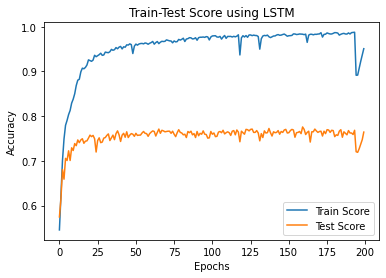

In [122]:
plt.plot(model_fitting_train.history["accuracy"])
plt.plot(model_fitting_train.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train-Test Score using LSTM")
plt.legend(["Train Score", "Test Score"])


The above chart demonstrates that training accuracy is steady at 96% where as test score is steady at 78%. This also indicates issue of overfitting. Futher investigation is required. Also further modeling can be done by using PCA Modelling.  

## Examples


### Example 1:

In [124]:
text1 = input(str())

NSW has reported 1742 new COVID-19 cases and no new deaths, Sarah McPhee reports. It is the highest daily total recorded for the state since the pandemic began, after a peak of 1599 cases on September 11. Health Minister Brad Hazzard yesterday said that cases would soon double every two to three days as the Omicron strain of the virus takes hold. There are now 192 coronavirus patients in NSW hospitals, 26 of whom are in intensive care. Hospital admissions are up by 26 patients from yesterday.


In [125]:
predict_text = [text1]

In [126]:

# Python program to convert a list to string
    
# Function to convert  
def listToString(predict_text): 
    """Convert Any list to a string"""
    
    # initialize an empty string
    text_1 = ""    # text_1 is just a variable
    
    # traverse in the string  
    for ele in predict_text: 
        text_1 += str(ele)  
    
    # return string  
    return text_1 
        

text_2 = listToString(predict_text) 


print("Subjetivity: ",getSScore(text_2))
print("Polarity: ",getPScore(text_2))
print("*"*50)

print("Naive Bayes")
predict_rating_cv(predict_text, naive_bayes_cv)
print("*"*50)



Subjetivity:  0.33181818181818185
Polarity:  0.013636363636363636
**************************************************
Naive Bayes
Prediction:1, Prediction Score:0.991626501133356
**************************************************


### Example 2:

In [127]:
text2 = input(str())

Just as Australia's high vaccination rate was starting to look like we had a grip on Delta along comes Omicron and in one stroke dramatically reduces the effectiveness of our high vaccination rate. Opening up and easing restrictions was based on levels of vaccination and predicted case numbers which are now totally out the window. We can't afford to continue with the same plan as if nothing has happened.


In [128]:
predict_text = [text2]

In [129]:

def listtistring(predict_text):
    text_1 = ""
    
    for ele in predict_text:
        text_1 +=str(ele)
        
        return tex




# Python program to convert a list to string
    
# Function to convert  
def listToString(predict_text): 
    """Convert Any list to a string"""
    
    # initialize an empty string
    text_1 = ""    # text_1 is just a variable
    
    # traverse in the string  
    for ele in predict_text: 
        text_1 += str(ele)  
    
    # return string  
    return text_1 
        

text_2 = listToString(predict_text) 

blob = TextBlob(text_2)
blob.correct()


print("Subjetivity: ",getSScore(text_2))
print("Polarity: ",getPScore(text_2))
print("*"*50)

print("Naive Bayes")
predict_rating_cv(predict_text, naive_bayes_cv)
print("*"*50)

Subjetivity:  0.4109999999999999
Polarity:  0.064
**************************************************
Naive Bayes
Prediction:1, Prediction Score:0.39968807819520713
**************************************************
